In [1]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv("Complete_student_analysis.csv")
df


,student_id,math_original,science_original,english_original,attendance,math_int8,attendance_float32,weighted_total,math_mean,science_mean,...,grade,bonus_points,final_score,math_original_zscore,science_original_zscore,english_original_zscore,math_original_percentile,science_original_percentile,english_original_percentile,overall_performance
0,1001,82.45,76.70,65.00,71,82,71,76.08,73.4422,79.4485,...,C,0,76.08,0.661,-0.238,-1.706,35.70,60.20,65.00,Needs Improvement
1,1002,72.93,68.88,65.30,90,72,90,69.60,73.4422,79.4485,...,D,0,69.60,-0.038,-0.917,-1.672,45.19,60.37,65.30,Needs Improvement
2,1003,84.72,64.79,65.61,99,84,99,72.97,73.4422,79.4485,...,C,0,72.97,0.828,-1.272,-1.637,45.60,60.66,65.61,Good
3,1004,97.85,73.50,65.91,70,97,70,81.34,73.4422,79.4485,...,B,0,81.34,1.792,-0.516,-1.603,46.30,61.48,65.91,Needs Improvement
4,1005,71.49,97.72,66.21,97,71,97,79.35,73.4422,79.4485,...,C,0,79.35,-0.143,1.585,-1.569,48.55,61.63,66.21,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,53.05,69.76,93.79,92,53,92,69.08,73.4422,79.4485,...,D,0,69.08,-1.497,-0.841,1.569,97.85,97.72,93.79,Needs Improvement
96,1097,79.44,98.92,94.09,91,79,91,89.92,73.4422,79.4485,...,B,5,94.92,0.440,1.689,1.603,98.07,98.50,94.09,Excellent
97,1098,78.92,75.72,94.39,88,78,88,81.67,73.4422,79.4485,...,B,0,81.67,0.402,-0.323,1.637,98.47,98.87,94.39,Good
98,1099,75.08,95.68,94.70,94,75,94,87.20,73.4422,79.4485,...,B,5,92.20,0.120,1.408,1.672,98.69,98.92,94.70,Excellent


## 1.convert data math_original to numpy array

In [3]:
math_array = df['math_original'].to_numpy()
print("Math Scores Array:")
print(math_array)

Math Scores Array:
[ 82.45  72.93  84.72  97.85  71.49  71.49  98.69  86.51  67.96  83.14
  68.05  68.01  78.63  46.3   49.13  66.57  59.81  79.71  61.38  53.82
  96.98  71.61  76.01  53.63  66.83  76.66  57.74  80.64  65.99  70.62
  65.97 102.78  74.8   59.13  87.34  56.69  78.13  45.6   55.08  77.95
  86.08  77.57  73.27  70.48  52.82  64.2   68.09  90.86  80.15  48.55
  79.86  69.22  64.85  84.18  90.46  88.97  62.41  70.36  79.97  89.63
  67.81  72.22  58.4   57.06  87.19  95.34  73.92  90.05  80.42  65.32
  80.42  98.07  74.46  98.47  35.7   87.33  76.31  70.51  76.38  45.19
  71.7   80.36  97.17  67.23  62.87  67.47  88.73  79.93  67.05  82.7
  76.46  89.53  64.47  70.09  69.12  53.05  79.44  78.92  75.08  71.48]


## 2.Generate Grade Boundaries Using linspace for science scores

In [4]:
min_score = df['science_original'].min()
max_score = df['science_original'].max()

grade = np.linspace(min_score,max_score,5)
print(grade)


[60.2    70.0075 79.815  89.6225 99.43  ]


## 3.Initialize Digital attendace system with zeroes

In [5]:
num_std = len(df)
attendence = np.zeros(num_std,dtype=int)
attendence

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4.Optimize Memory usage for student Performance grades

In [6]:
print(f"Original 'grade' dtype: {df['grade'].dtype},"f"Memory: {df['grade'].memory_usage(deep=True)}")
print("Before optimization memory usage")
print(df['grade'].memory_usage(deep=True))  # deep check full merory usage where memory use memory me bhi check krega ram me bhi
df['grade'] = df['grade'].astype('category')
print(f"Optimized 'grade' dtype: {df['grade'].dtype}")
print("Memory usage after optimization")
print(df['grade'].memory_usage(deep=True))

Original 'grade' dtype: object,Memory: 5132
Before optimization memory usage
5132
Optimized 'grade' dtype: category
Memory usage after optimization
604


## 5.Optimize storage for math score using Different integer Types

In [7]:
print(f"Original dtype:{df['math_original'].dtype},")
#convert to int8
df['math_int8_fixed'] = df['math_original'].astype(np.int8)
print(f"'math_int8_fixed' dtype:{df['math_int8_fixed'].dtype}"f"Memory: {df['math_int8_fixed'].memory_usage(deep=True)}" )
#convert attendance -> uint8(correct)
df['attendance_unit8'] = df['attendance'].astype(np.uint8)
print(f"'attendance_unit8' dtype: {df['attendance_unit8'].dtype},")


Original dtype:float64,
'math_int8_fixed' dtype:int8Memory: 232
'attendance_unit8' dtype: uint8,


## 6.Explore float Precision with science_original scores

In [8]:
print(f"Original dtype:{df['science_original'].dtype},")  #for machine model we use float 16
df['science_float16_fixed'] = df['science_original'].astype(np.float16)
print(f"'science_float16_fixed' dtype:{df['science_float16_fixed'].dtype}" )



Original dtype:float64,
'science_float16_fixed' dtype:float16


## 7.Optimize memory for attendance data

In [9]:
print(f"Original dtype:{df['attendance'].dtype},")
df['attendance_unit8'] = df['attendance'].astype(np.uint8)
print(f"'attendance_unit8' dtype: {df['attendance_unit8'].dtype},")


Original dtype:int64,
'attendance_unit8' dtype: uint8,


## 8.Compare Math Scores Between Different Student Group

In [10]:
math_score_by_grade = df.groupby('grade')['math_original'].mean()
print("Average math scores by grade:")
print(math_score_by_grade)

Average math scores by grade:
grade
A    95.667500
B    83.802424
C    70.445532
D    55.320625
Name: math_original, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15544\3760618801.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  math_score_by_grade = df.groupby('grade')['math_original'].mean()


## 9.Calculate Average Scores with custom weights

In [11]:
math_weight = 0.4
sciece_weight = 0.3
english_weight = 0.3

df['custom_weighted_score'] = (df['math_original']* math_weight+
                                df['science_original'] * sciece_weight +
                                df['english_original'] * english_weight)


## 10. Compare attendance between different student groups

In [12]:
attendence_by_grade = df.groupby('grade')['attendance'].mean()
print("Average attendance by grade")
print(attendence_by_grade)

Average attendance by grade
grade
A    91.000000
B    84.939394
C    82.957447
D    89.875000
Name: attendance, dtype: float64


C:\Users\harsh\AppData\Local\Temp\ipykernel_15544\3401884745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendence_by_grade = df.groupby('grade')['attendance'].mean()


### 11.Find class performance metrices from math_original scores

In [13]:
math_score_max = df['math_original'].max()
math_score_min = df['math_original'].min()
math_score_mean = df['math_original'].mean()
math_score_mode = df['math_original'].mode()
print(math_score_max)
print(math_score_min)
print(math_score_mean)
print(math_score_mode)


102.78
35.7
73.44219999999999
0    71.49
1    80.42
Name: math_original, dtype: float64


### 12.Analysis Score Distribution Using science_original data

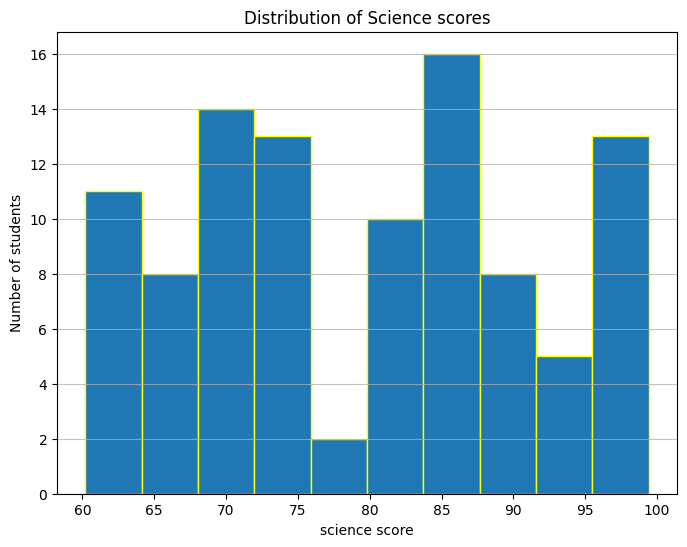

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(df['science_original'],bins=10,edgecolor='yellow')
plt.title('Distribution of Science scores')
plt.xlabel('science score')
plt.ylabel('Number of students')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 13.Find Top performers in english_original Test

In [15]:
english_top = df.nlargest(5,'english_original')
print(english_top[['student_id','english_original']])

    student_id  english_original
99        1100             95.00
98        1099             94.70
97        1098             94.39
96        1097             94.09
95        1096             93.79


### 14.Apply bonus points to math_original scores

In [16]:
df['math_bonus'] = df['math_original']+5
print(df[['math_original','math_bonus']].head())

   math_original  math_bonus
0          82.45       87.45
1          72.93       77.93
2          84.72       89.72
3          97.85      102.85
4          71.49       76.49


### 15.Scale attendance data based on term weights

In [17]:
df['scale_attendence'] = df['attendance']*0.8    #calc 100% to 80%
print(df[['attendance','scale_attendence']].head())

   attendance  scale_attendence
0          71              56.8
1          90              72.0
2          99              79.2
3          70              56.0
4          97              77.6


### 16.Noramlize science_original score using broadcasting

In [18]:
#normalize means between 0 & 1
science_max = df['science_original'].max()
science_min = df['science_original'].min()

df['science_norm'] = (df['science_original']-science_min)/(science_max-science_min)
print(df[['science_original','science_norm']])

    science_original  science_norm
0              76.70      0.420596
1              68.88      0.221259
2              64.79      0.117002
3              73.50      0.339026
4              97.72      0.956411
..               ...           ...
95             69.76      0.243691
96             98.92      0.987000
97             75.72      0.395616
98             95.68      0.904410
99             85.25      0.638542

[100 rows x 2 columns]


### 17.Vectorize Grade Calculation from final_score

In [19]:
def assign_grade(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['calculated_grade'] = df['final_score'].apply(assign_grade)
print("first 5 calculated grades: ")
print(df[['final_score','calculated_grade']].head())    

first 5 calculated grades: 
   final_score calculated_grade
0        76.08                C
1        69.60                D
2        72.97                C
3        81.34                B
4        79.35                C


### 18.Pass or Fail

In [20]:
def assign(score):
    if score>70 : return 'Pass'
    else: return 'fail'

df['calculated_grade'] = df['final_score'].apply(assign)
print(df[['final_score','calculated_grade']].head())    


   final_score calculated_grade
0        76.08             Pass
1        69.60             fail
2        72.97             Pass
3        81.34             Pass
4        79.35             Pass


## 19.find attendance eligibility using vectorized comparision

In [24]:
# def attend(attendac):
#     if attendac>75 : return 'eligible'
#     else: return 'not eligible'

# df['calculated_attendace'] = df['attendance'].apply(attend)
# print(df[['attendance','calculated_attendace']].head())    


att_threshold = 75
df['att_elg'] = np.where(df['attendance'] >= att_threshold, 'Eligible','Not eligible')
print("First 5 atttendace eligibility:")
print(df[['attendance','att_elg']].head())


First 5 atttendace eligibility:
   attendance       att_elg
0          71  Not eligible
1          90      Eligible
2          99      Eligible
3          70  Not eligible
4          97      Eligible
